In [33]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

In [181]:
# Import dataframe
df_main = pd.read_csv('Resources/nyc_bakeries_aggregated.csv', index_col='Unnamed: 0')
df_main['phone'] = df_main['phone'].apply(lambda x: False if pd.isna(x) else True)
df_main['display_phone'] = df_main['display_phone'].apply(lambda x: False if pd.isna(x) else True)
# Convert price into numerical values
df_main['price'] = df_main['price'].replace({'$': 1, 
                                             '$$': 2,
                                             '$$$': 3,
                                             '$$$$' : 4,
                                             '$$$$$' : 5})
df_main.head()

,id,name,review_count,category,rating,phone,display_phone,price,coord_lat,coord_long
0,epvSBt9LldIgyc08f8nIAw,La Bicyclette Bakery,3,bakeries,4.5,False,False,NaN,40.683587,-73.995090
2,-k_5NsYnKCHGTdBaqegkrw,Le Fournil,118,bakeries,4.5,False,False,2.0,40.727947,-73.988489
4,0kW0112jMERVjpRzWT4F7Q,La Bicyclette Bakery,84,bakeries,5.0,True,True,NaN,40.714400,-73.959110
6,XSwagBljEsxG2i1rq4GEAQ,Almondine Bakery,404,bakeries,4.0,True,True,2.0,40.703317,-73.991251
8,fPQ2eE9lm8tc87O5-GLjyA,Mille-Feuille Bakery,441,coffee,4.5,True,True,2.0,40.782425,-73.981160


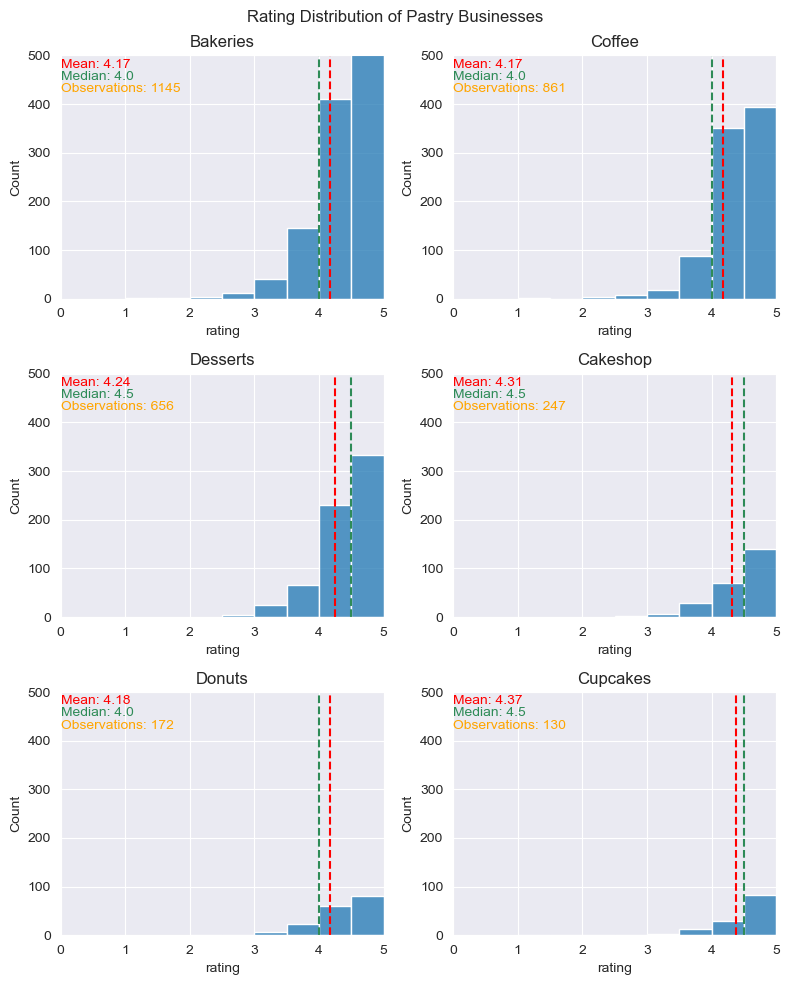

In [157]:
# Summaries
num_businesses = df_main.id.nunique()
total_reviews = df_main.review_count.sum()
df_main.category.value_counts()

# Plot business types
    # Generate Figure
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
fig.suptitle('Rating Distribution of Pastry Businesses')

    # Define categories of interest
categories = ['bakeries', 'coffee', 'desserts', 'cakeshop', 'donuts', 'cupcakes']

    # Flatten 2D array and iterate through it along with the categories and titles
for axis, category, title in zip(ax.flatten(), categories, [cat.title() for cat in categories]):
    axis.set_title(title)
    sns.histplot(data=df_main[df_main['category'] == category].rating, ax=axis, binwidth=0.5, bins=10)
    axis.axvline(df_main[df_main['category'] == category].rating.mean(), linestyle='dashed', color='red')
    axis.axvline(df_main[df_main['category'] == category].rating.median(), linestyle='dashed', color='seagreen')
    axis.text(0, 475, f"Mean: {round(df_main[df_main['category'] == category]['rating'].mean(), 2)}", color='red')
    axis.text(0, 450, f"Median: {round(df_main[df_main['category'] == category]['rating'].median(), 2)}", color='seagreen')
    axis.text(0, 425, f"Observations: {len(round(df_main[df_main['category'] == category], 2))}", color='orange')

# Set chart limits
for r in range(3):
    for c in range(2): 
        ax[r, c].set_ylim(0, 500)
        ax[r, c].set_xlim(0, 5)
        
plt.tight_layout()
plt.show()

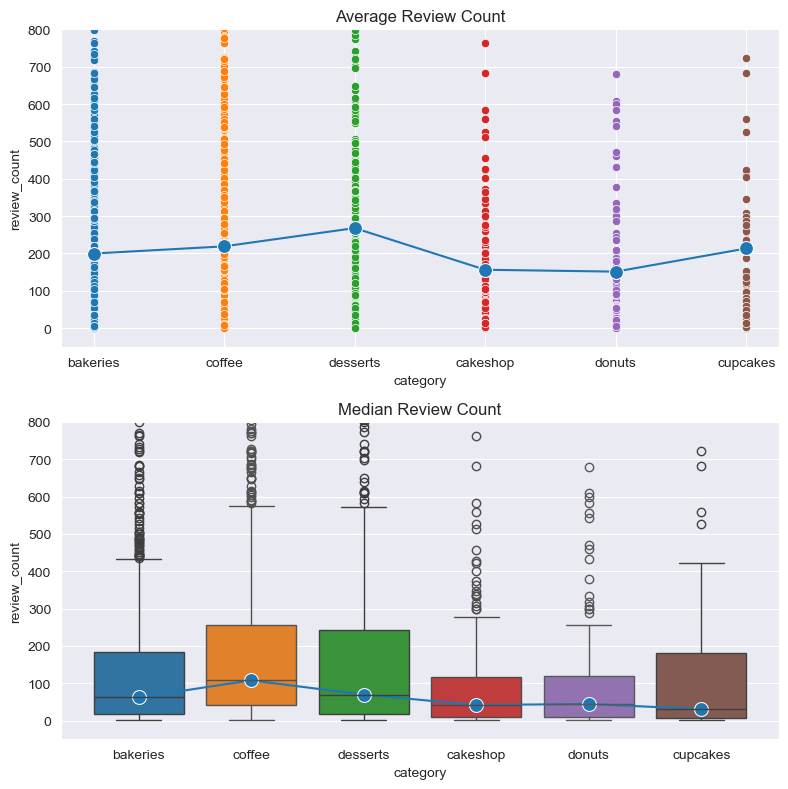

In [243]:
# Plot review counts
fig1,ax1 = plt.subplots(2,1, figsize=(8,8))
review_count_means = []
review_count_medians = []
for category in categories:
    sns.scatterplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1[0])
    ax1[0].set_title("Average Review Count")
    ax1[0].set_ylim(-50, 800)
    review_count_means.append(df_main[df_main['category'] == category].review_count.mean())
    sns.boxplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1[1])
    ax1[1].set_title("Median Review Count")
    ax1[1].set_ylim(-50, 800)
    review_count_medians.append(df_main[df_main['category'] == category].review_count.median())
    
sns.lineplot(review_count_means, marker='o', markersize=10, ax=ax1[0])
sns.lineplot(review_count_medians, marker='o', markersize=10, ax=ax1[1])
plt.tight_layout()
plt.show()

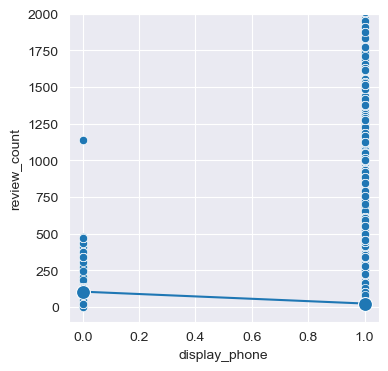

In [309]:
# Phone number comparison
fig2,ax2 = plt.subplots(figsize=(4,4))
sns.scatterplot(data=df_main, x='display_phone', y='review_count', ax=ax2)
review_count_medians_w_phone = [df_main[df_main['display_phone'] == True].review_count.median(),
                                df_main[df_main['display_phone'] == False].review_count.median()]
sns.lineplot(review_count_medians_w_phone, marker='o', markersize=10, ax=ax2)
ax2.set_ylim(-100,2000)
plt.show()

In [241]:
# Jittering review_count
price_jitter = (np.random.choice(df_main['price'], size=1000)) + np.random.normal(0, 0.1, size=1000)
review_count_jitter = (np.random.choice(df_main['review_count'], size=1000)) + np.random.normal(0, 0.1, size=1000)
rating_jitter = (np.random.choice(df_main['rating'], size=1000)) + np.random.normal(0, 0.1, size=1000)
jittery_df = pd.DataFrame({'price': price_jitter,
                           'review_count': review_count_jitter})

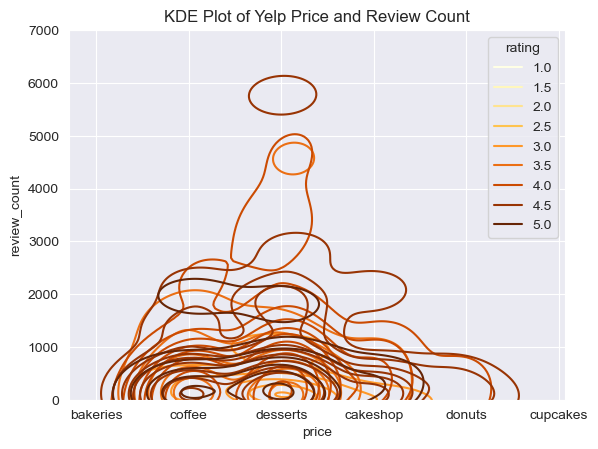

In [344]:
# Plot Jittered Data
current_palette = sns.color_palette("viridis", n_colors=1)
reversed_palette = current_palette[::-1]
sns.kdeplot(data=jittery_df, x='price', y='review_count', hue=df_main['rating'], palette='YlOrBr')
plt.title('KDE Plot of Yelp Price and Review Count')
plt.ylim(0,7000)
plt.xticks(np.arange(0,6), ['bakeries', 'coffee', 'desserts', 'cakeshop', 'donuts', 'cupcakes'])
plt.show()

In [367]:
# K means clustering
categories = ['bakeries', 'coffee', 'desserts', 'cakeshop', 'donuts', 'cupcakes']
from sklearn.cluster import KMeans

sorted_df_list = []
for cat in categories:
    sorted_df_list.append(df_main[df_main['category'] == cat])
sorted_df = pd.concat(sorted_df_list, ignore_index=True)
sorted_df['category'] = sorted_df['category'].replace({'bakeries': 1,
                                                       'coffee': 2, 
                                                       'desserts': 3, 
                                                       'cakeshop': 4, 
                                                       'donuts': 5, 
                                                       'cupcakes': 6})

sorted_df['category'] = (np.random.choice(sorted_df['category'], size=3211)) + np.random.normal(0, 0.01, size=3211)
sorted_df['review_count'] = (np.random.choice(sorted_df['review_count'], size=3211)) + np.random.normal(0, 0.5, size=3211)

clustered_df = sorted_df[['category', 'review_count']]

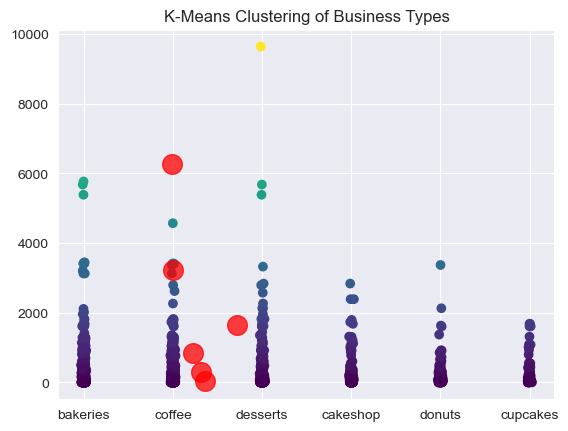

In [368]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(clustered_df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
clustered_df['label'] = labels
plt.scatter(sorted_df['category'], sorted_df['review_count'], c=sorted_df['review_count'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xticks(np.arange(1,7), ['bakeries', 'coffee', 'desserts', 'cakeshop', 'donuts', 'cupcakes'])
plt.title('K-Means Clustering of Business Types')
plt.show()